Christian Taylor

415 Review / Exam Help

In [ ]:
import pandas as pd
df = pd.read_csv('')

df.head()

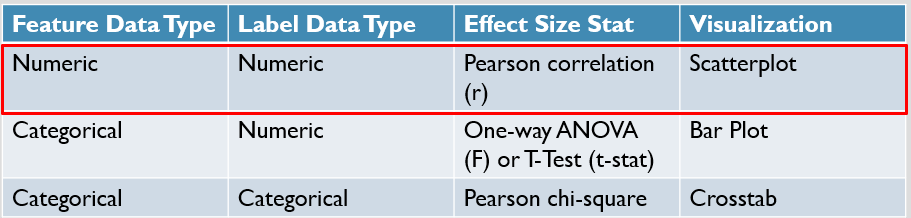

Contents:

Dataframes Day 1: Creating a df, methods

Dataframes Day 2: methods, 

Univariate: Methods, Histplot, Boxplot, Pivot Tables

N_N Bivariate: Scatterplot

C_N Bivariate: Bar Plot

Data Wrangling:

C_C Bivariate: Crosstab

_____________________________________________________

DATA FRAMES DAY 1

Create dataframe:

#Make your own DataFrame with 2 rows and 2 columns
bears = [["red", "small"], ["black and white", "large"]]
DFBear = pd.DataFrame(bears, index=["Chifu","Po"], columns=["color", "size"])
DFBear

df.iloc[2]  # 3rd row
df.iloc[:2] # 1st 2 rows
df.iloc[2:5] # Rows 3-5, it doesn't include the last index row number you include

df.loc['string pk of table']

**Add a row**
nevilleLongbottomList = ["Gryffindor", 11, "Male", "Pure-blood"]
HP_df.loc['Neville Longbottom'] = nevilleLongbottomList


**Add list as df column: (Can use insert to specify where)**
hairColor = ['Brown', 'Brown', 'Blond', 'Black', 'Black']

HP_df["HairColor"] = hairColor

Can drop rows or columns w/labeled indexes

Sort:
df = df.sort_values(by=['age'], ascending=True)
df
_________________________________________________________________________________

DATA FRAMES DAY 2

Filter by column:
filtered_df = df[['age', 'charges', 'sex']] #need an extra set of brackets '[]'. Indicates we're inputting a list.

**Return all individuals that have charges 50000 or greater and are NOT from either the northwest, southwest, or southeast region.**
df[(~df.region.isin(regionList)) & (df.charges >= 50000)]

.groupby() can let us do aggregate stuff like in SQL
#Group by smokers and non-smokers
#Get the average for the charges column
df.groupby('smoker').charges.mean()
_____________________________________________________________________

UNIVARIATE:

Methods:
describe, pd.api.types.is_numeric_dtype, count, nunique, unique, sum, mean, median, mode, min, max, quantile, std, skew, kurt

Attributes:
dtypes, shape


Histplot:
(Hue is optional, adds another dimension to the viz)

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df, x = 'charges', hue='smoker')
plt.title('Charges')
plt.show()

Boxplot:

import seaborn as sns
sns.boxplot(df, x='charges')

Pivot Tables:

(These 2 are the same, but the second only shows smallest. nlargest would do opposite)

import pandas as pd
df.pivot_table(index = "region", values = "charges", aggfunc="mean").sort_values("charges", ascending=True)

df.pivot_table(index="region", values = 'age', aggfunc='mean').nsmallest(1, 'age')


______________________________________________________

N_N BIVARIATE:

Find pearson r and p-value:
from scipy import stats

r, p = stats.pearsonr(df.Acceleration, df.MPG)
print('r: ' + str(round(r, 4)))
print('p-value:' + str(round(p, 4)))


Scatterplot:

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = df.Acceleration, y = df.MPG)
plt.show()


Correlation (r) and p-value for all variables to 1 (MPG in this case):

corr_df = pd.DataFrame(columns = ['r', 'p-value'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df[col], df.MPG)
    corr_df.loc[col] = [round(r, 3), round(p,6)]

corr_df.sort_values(by=['r'], ascending=False)


Correlation matrix with heat map to show all possible r values:

import seaborn as sns

correlation_mat = df.select_dtypes(include="number").corr()

sns.heatmap(correlation_mat, annot = True)


Linear Regression Equation:

import numpy as np
m, b = np.polyfit(df.Displacement, df.MPG, 1)
print('y = ' + str(round(m, 3)) + 'x +' + str(round(b, 3)))


Plot linear regression (scatterplot):

import seaborn as sns
import matplotlib as plt
sns.lmplot(x ='Displacement', y ='MPG', data = df)
plt.show()


R Square indicates percentage of the variance the independent variable (x) explains of the dependent variable (y). Higher R square represents smaller differences between observed and predicted values and is typically better. Calculate R square:

r, p = stats.pearsonr(df.Displacement, df.MPG)

r2 = r ** 2
r2



**Heteroskedasticity**


from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.formula.api import ols

**Fit the OLS model**
model = ols(formula='Displacement~MPG', data=df).fit()
white_test = het_white(model.resid, model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(3)
___________________________________________________________________________________________________

N_C BIVARIATE:

t-test determines if 2 means are equal or not. Higher t-stat means more difference between groups. Positive t-stat means first value is higher than second.
Get t-stat and p-val:

from scipy import stats

male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']

t, p = stats.ttest_ind(male.charges, female.charges)
print("t: " + str(round(t, 3)))
print("p: " + str(round(p, 3)))


Put it on a histplot (categorical variable is hue):

import seaborn as sns

sns.histplot(data=df, x='charges', kde=True, hue='sex')



ANOVA:
F-stat determines if there is a significant difference between means of 3 or more groups or if all are equal.

Brute force method:

from scipy import stats

southwest = df[df['region'] == 'southwest']
northwest = df[df['region'] == 'northwest']
northeast = df[df['region'] == 'northeast']
southeast = df[df['region'] == 'southeast']

f, p = stats.f_oneway(southwest.charges, northwest.charges, northeast.charges, southeast.charges)

print('\nF:'+str(f))
print('p:'+str(p))

Better method:

from scipy import stats

groups = df['region'].unique()  #Filter to all the unique regions (northwest, southeast, northwest, southwest)
group_labels = []               #Create an empty list that will be a two-dimensional list of lists to store the label values associated with each category
for g in groups:                #Loop through each unique region
  group_labels.append(df[df['region'] == g]['charges'])  #add to the group_labels list the charges for that region
f, p =  stats.f_oneway(*group_labels) #perform a one way anova on all the regions. *group_labels is a shortcut way of listing out each of the regions.

print('F: ' + str(round(f, 4)))
print('p: ' + str(round(p, 4)))


Tukey's Honestly Significant Difference (HSD) is performed after ANOVA (post-hoc test) to reduce Type 1 error (rejecting a true null). It compares all pairs of group values.

from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['charges'],
                          groups=df['region'],
                          alpha=0.05)

print(tukey)


Bar plots:

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df)

plt.title('Insurance Charges by Region and Smoker')
plt.show()

___________________________________________________________________________________________________

DATA WRANGLING

df.info()
df.isnull().sum()
df[df['smoker'].isna()]
df.dropna(axis = 1, inplace = True)    # Deletes columns w/missing data
df = df.dropna(subset=['charges'])     # Deletes rows w/missing data
df['children'] = df.children.fillna(0)   # Imputation: Fills missing values with data (0)
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df.head(10)     # Fills missing values with the mean
pd.to_datetime(df['signup_date'])

Itertuples:
Allows you to iterate through rows 

This lets you bin things:

for row in df.itertuples():
  if row.age < 20:
    df.at[row.Index, 'Age_Group'] = "Teens"
  elif row.age < 30:
    df.at[row.Index, 'Age_Group'] = "20s"
  elif row.age < 40:
    df.at[row.Index, 'Age_Group'] = "30s"
  elif row.age < 50:
    df.at[row.Index, 'Age_Group'] = "40s"
  elif row.age < 60:
    df.at[row.Index, 'Age_Group'] = "50s"
  else:
    df.at[row.Index, 'Age_Group'] = "60s"


Merge (like a join):

merged_df = pd.merge(df, weather_df, how='left', left_on='region', right_on='Region')


from datetime import datetime
EndOfTrialString = '2023-01-01'
EndOfTrial = datetime.strptime(EndOfTrialString, '%Y-%m-%d')

Calculate an interval
df['days_in_trial'] = (EndOfTrial - df['signup_date']).dt.days
df
_______________________________________________________________________________________________________

C_C BIVARIATE:

Chi square determines if there is a significant relationship between 2 categorical variables.


Observed counts:

import seaborn as sns
import matplotlib.pyplot as plt

crosstab = pd.crosstab(index = df['Purchased Bike'], columns = df['Region'])

plt.title('Observed Counts of Purchased Bike and Region')

sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')

plt.show()


Expected counts:

import numpy as np
from scipy.stats import chi2_contingency

**1 - Create a crosstab with the observed counts (like we did above)**
crosstab = pd.crosstab(index = df['Purchased Bike'], columns = df['Region'])

**2 - Pass the observed crosstab to the chi2_contigency**
**This returns 4 values: the chi-square, p-value, degrees of freedom, and expected values**
**We will use the chi-square and p-value later. Now we just need the expected values**
x, p, dof, expected_values = chi2_contingency(crosstab)

**3 - Create a dataframe with the expected values**
ex_df = pd.DataFrame(np.rint(expected_values).astype('int64'), columns=crosstab.columns, index = crosstab.index )

**4 - Pass the expected values dataframe to a heatmap**
sns.heatmap(ex_df, annot=True,  fmt='d', cmap='coolwarm')

**5 - Add a title**
plt.title('Expected Values of Purchased Bike and Region')

plt.show()


Get chi-square and p-value:
**1 - generate the observed crosstab (just like above)**
crosstab = pd.crosstab(index = df['Purchased Bike'], columns = df['Region'])

**2 - pass the observed crosstab to the chi2_contingency (just like above)**
x, p, dof, expected_values = chi2_contingency(crosstab)

print('chi-square: ' + str(round(x,4)))
print('p-value: ' + str(round(p, 4)))





______________________________________________________________________________________________